#### Implementing PCA

In [13]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.decomposition import FactorAnalysis

In [9]:
economic_data = pd.read_csv("imputed_economic_data_mice.csv")

numeric_data = economic_data.drop(columns=['Country', 'Year'])

numeric_data_standardized = (numeric_data - numeric_data.mean()) / numeric_data.std()

pca = PCA()
pca.fit(numeric_data_standardized)

explained_variance_ratio = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

In [10]:
for i, var in enumerate(explained_variance_ratio, start=1):
    print(f"PC{i}: {var * 100:.2f}% variance explained")

PC1: 44.43% variance explained
PC2: 19.35% variance explained
PC3: 18.05% variance explained
PC4: 12.16% variance explained
PC5: 3.90% variance explained
PC6: 2.11% variance explained


#### Implementing Factor Analysis

In [6]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(numeric_data)

kmo_all,kmo_model=calculate_kmo(df_scaled)
kmo_model

np.float64(0.7223884200666137)

In [7]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.fit(df_scaled)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([2.66590039, 1.16110818, 1.08314124, 0.72955712, 0.23371786,
       0.12657521])

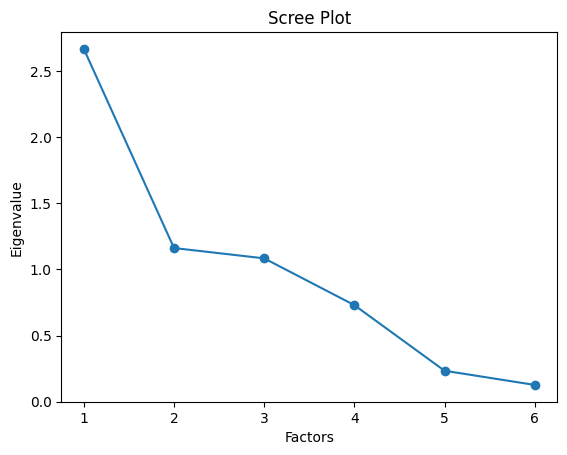

In [8]:
import matplotlib.pyplot as plt
plt.scatter(range(1,df_scaled.shape[1]+1),eigen_values)
plt.plot(range(1,df_scaled.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.show()

In [14]:
columns_for_fa = [
    'Inflation_Rate','GDP_Per_Capita','GDP_Growth_Rate','Unemployment_Rate','Cost of Living Index',
    'Local Purchasing Power Index'
]

data_filled = economic_data[columns_for_fa]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filled)

fa = FactorAnalysis(n_components=1)

factor_scores = fa.fit_transform(data_scaled)

economic_data['Economic_Index_FA'] = factor_scores.round(3)

pca = PCA(n_components=1)
pca_scores = pca.fit_transform(data_scaled)
economic_data['Economic_Index_PCA'] = pca_scores.round(3)

In [16]:
economic_data.to_csv("Economic_Index.csv",index=False)